# Problem 1:


In [1]:
# Not allowed to use any sampling libraries/functions. 
# But you are allowed to use rand() call to generate a pseudo-uniform value in [0,1]
# can also use a library to compute pdf(x|params). 

import math
import random
import numpy as np

# from scipy.stats import pdf
# from scipy.stats import multivariate_normal as mvn

In [ ]:
# going to need a function to simulate rolling a dice
def roll_dice(num_faces, probabilities):
    """
    Simulates rolling a dice with a specified number of faces and probabilities.

    Args:
        num_faces (list): A list of face values for the dice.
        probabilities (list): A list of probabilities corresponding to each face.

    Returns:
        int/str: The face value that was rolled.
    """
    # generate list from 1:n with step 1
    faces = list(range(1, num_faces + 1))
    
    # pseudo generate a random number in [0, 1]
    rand_val = random.random()

    




# Example usage:
roll_dice(6)

In [2]:
# A. Implement Simple Sampling from continuous distributions:
    # uniform (min, max, sample_size)
    # gaussian (mu, sigma, sample_size)

def uniform(min_val, max_val, sample_size):
    samples = []
    for _ in range(sample_size):
        sample = min_val + (max_val - min_val) * random.random()
        samples.append(sample)
    return samples

def gaussian(mu, sigma, sample_size):
    samples = []
    for _ in range(sample_size):
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        sample = mu + sigma * z0
        samples.append(sample)
    return samples


uniform_distr_samples = uniform(0, 1, 10000)
gaussian_distr_samples = gaussian(0, 1, 10000)

Text(0, 0.5, 'Frequency')

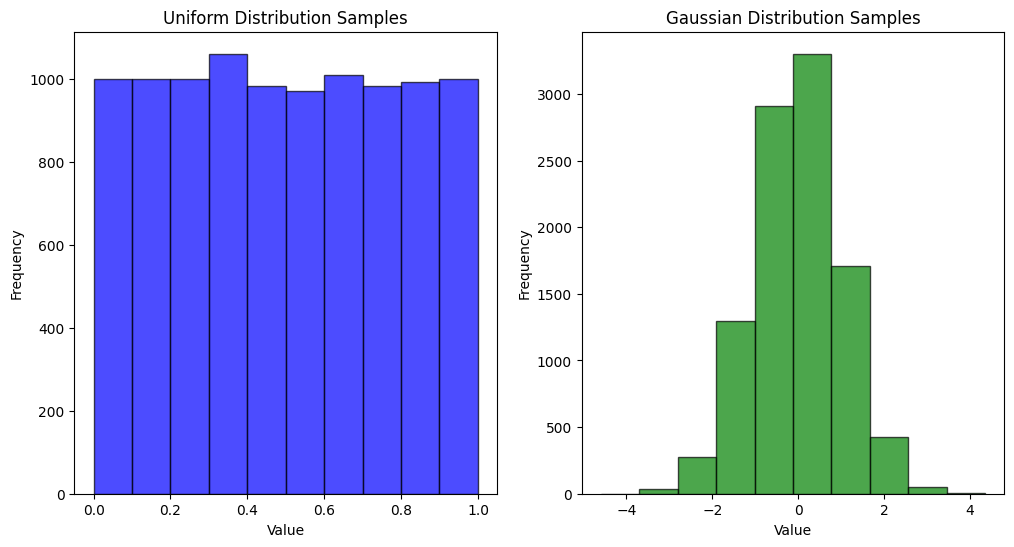

In [3]:
# plot them:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(uniform_distr_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(gaussian_distr_samples, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Gaussian Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')


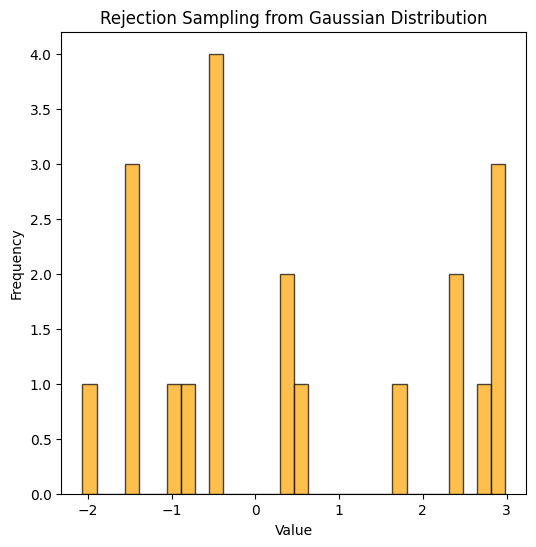

In [ ]:
# Rejection Sampling from continuous distributions:
from scipy.stats import norm

def rejection_sampling(pdf, sample_size, bounds, num_samples=10000):
    samples = []
    min_val, max_val = bounds
    for _ in range(sample_size):
        while True:
            x = min_val + (max_val - min_val) * random.random()
            y = random.random() * pdf(x)
            if y <= pdf(x):
                samples.append(x)
                break
    return samples

#1.  random mu and sigma -> multivariate list of mu 1x2 and sigma 2x2
#2.  start with random discrete distribution (uniform) prior (A,B) -> lower bound, upper bound
    # A1 B1, A2,B2 where unif_1, unif_2 1x2 arrays

# 3. how many samples to generate

# 4. multivariate gaussian pdf(x|mu,sigma) -> max f(x)
    # begin loop for each sample
    # generate random sample from (unif_1, unif_2)

    # compute f(x) multivariate guassian pdf(x|mu,sigma)
    # compute g(x) is generator sample
    # acceptance ratio = f(x)/max(f(x) * g(x)
    # generate np.rand.rand() in [0,1] and compare with acceptance ratio
    # z if > or <= accept/reject
def gaussian_pdf(x, mu=0, sigma=1):
    return norm.pdf(x, loc=mu, scale=sigma)

rejection_samples = rejection_sampling(gaussian_pdf, 20, (-3, 3))

plt.figure(figsize=(6, 6))
plt.hist(rejection_samples, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Rejection Sampling from Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# scatter plot

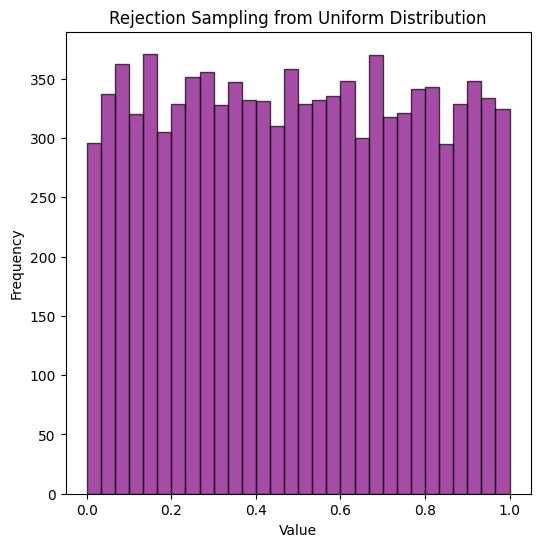

In [5]:
# From uniform distribution using rejection sampling
def uniform_pdf(x, min_val=0, max_val=1):
    if min_val <= x <= max_val:
        return 1 / (max_val - min_val)
    return 0

rejection_uniform_samples = rejection_sampling(uniform_pdf, 10000, (0, 1))
plt.figure(figsize=(6, 6))
plt.hist(rejection_uniform_samples, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Rejection Sampling from Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [6]:
# B. Implement sampling from a 2-dim Gaussian Distribution (2d mu, 2d sigma, sample_size)
# -> Rejection Sampling

In [7]:
# C. Implement without-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). 
    # Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

In [8]:
# Stevens method:

# 1. Bucketize into K buckets
def bucketize(population, K):
    n = len(population)
    bucket_size = max(1, n // K)
    buckets = []
    for i in range(0, n, bucket_size):
        buckets.append(population[i:i + bucket_size])
    return buckets

# Uniformly distribute within the buckets
def stevens_sampling(population, sample_size):
    K = max(1, len(population) // sample_size)
    buckets = bucketize(sorted(population), K)
    samples = []
    
    for bucket in buckets:
        if len(samples) >= sample_size:
            break
        if bucket:
            samples.append(random.choice(bucket))
    
    # If we still don't have enough samples, randomly sample from the population
    while len(samples) < sample_size:
        samples.append(random.choice(population))
    
    return samples[:sample_size]

